# 9.5 사이파이를 사용한 검정  
앞 절에서 검정 방법을 공부하고 통계량분포의 누적분포함수를 사용하여 유의확률을 계산하는 방법을 살펴보았다. 사이파이 패키지는 다음과 같은 다양한 검정 명령을 제공한다. 따라서 사이파이 패키지를 사용하면 여러분이 직접 통계량을 계산하거나 통계량분포의 누적분포함수로 유의확률을 계산할 필요가 없다. 또한 검정으로 내린 결론이 틀린 경우인 1종오류와 2종오류에 대해서도 살펴본다.

- 이항검정(Binomial Test)
- 카이제곱검정(Chi-squared Test)
- 카이제곱 독립검정(Chi-squared Contingency Test)
- 단일표본 z검정(One-sample z-Test)
- 단일표본 t검정(One-sample t-Test)
- 독립표본 t검정(Independent two-sample t-Test)
- 대응표본 t검정(Paired two-sample t-Test)
- 등분산검정(Equal-variance Test)
- 정규성검정(Normality Test)


In [7]:
import scipy as sp
import numpy as np

## 이항검정
이항검정은 이항분포를 이용하여 베르누이 확률변수의 모수 $\mu$에 대한 가설을 조사하는 방법이다. 사이파이 stats 서브패키지의 `binom_test` 명령은 이항검정의 유의확률을 계산한다. 디폴트 귀무가설은 $\mu = 0.5$이다.

```python
scipy.stats.binom_test(x, n=None, p=0.5, alternative='two-sided')
```
- x: 검정통계량. 1이 나온 횟수
- n: 총 시도 횟수
- p: 귀무가설의 $\mu$값
- alternative: 양측검정인 경우에는 'two-sided', 단측검정인 경우에는 'less' 또는 'greater'



### 이항검정 예제
실제 모수 $\mu_0=0.5$ 인 베르누이 확률 변수의 시뮬레이션을 통해 이항검정을 실습해보자. 데이터 개수 N=10일 때 1이 나온 횟수가 7이다.

In [8]:
N = 10
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

7

모수가 0.5인 베르누이 분포라면 가장 가능성이 높은 5가 나와야 하는데 여기에는 7이 나왔다. 그렇다면 이 확률변수의 모수는 0.5가 아니라 0.7일까? 모수가 0.5라는 귀무가설의 신빙성을 확인하기 위해 `binom_test` 이항검정 명령으로 유의확률을 구하면 약 34%이다.

In [9]:
# p-value 구하기
# 10번 던져서 7번 앞면이 나왔다고 해서, 동전이 fair하다(모수 = 0.5)는 귀무가설을 기각할 수 없다.
sp.stats.binom_test(n, N)

0.3437499999999999

### 이항검정 예제 2
$\mu=0.5$라고 생각되는 확률변수에서 데이터 갯수 N=100번 시뮬레이션하여, 1이 49번 나온 경우에 대해 이항검정을 실시해보자.

In [11]:
N = 100
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [14]:
# 유의확률이 92%이므로, mu=0.5라는 귀무가설을 기각할 수 없다.
sp.stats.binom_test(n, N)

0.9204107626128206

### 이항검정 예제 3
$\mu=0.5$라고 생각되는 확률변수에서 데이터 갯수 N=100번 시뮬레이션하여, 1이 31번 나온 경우에 대해 이항검정을 실시해보자.

In [16]:
N = 100
n = 31
sp.stats.binom_test(n, N) # mu=0.5라는 귀무가설을 유의수준 1%에서 기각할 수 있다.

0.00018314322488235352

### 연습문제 9.5.1
동전을 N번 던져서 앞면이 나오는 횟수를 측정했다. 다음 질문에 답하여라.

1. N = 10이고 유의 수준이 10%라면, 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기할 수 있을까?
2. N = 1000이고 유의 수준이 10%라면, 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기할 수 있을까?
    - 이 때 1 ~ N의 횟수 범위 중에서 동전이 공정하다고 이야기할 수 있는 횟수의 범위(비율)는 N=10일 때와 비교하여 넓은가 혹은 좁은가?

In [40]:
# 1번 문제
problem1 = [i for i in range(0, 11) if sp.stats.binom_test(i, 10) < 0.1]
print(len(problem1) / 10) # 40%의 경우 불공정, 60%의 경우 공정하다고 볼 수 있다.
problem1

0.4


[0, 1, 9, 10]

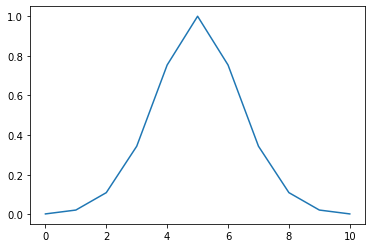

In [44]:
from matplotlib import pyplot as plt
plt.plot([sp.stats.binom_test(i, 10) for i in range(0, 11)])

In [39]:
# 2번 문제
# 공정하다고 생각할 수 있는 앞면 횟수의 범위는 N=10일 때와 비교하여 매우 좁다.
problem2 = [i for i in range(0, 1001) if sp.stats.binom_test(i, 1000) < 0.1]
len(problem2) / 1000 # 약 95%의 경우 불공정, 약 5%의 경우에만 공정하다.

0.948

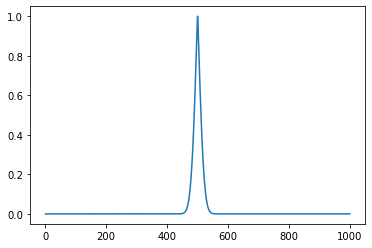

In [45]:
plt.plot([sp.stats.binom_test(i, 1000) for i in range(0, 1001)])

### 연습문제 9.5.2
다음 코드를 실행하면 어느 식당의 매출과 팁(tip) 데이터를 구할 수 있다.

```python
import seaborn as sns
tips = sns.load_dataset("tips")
```
하나의 레코드(행)이 한 명의 손님을 나타낸다고 가정하자. 열마다 성별(sex), 흡연유무(smoke), 점심/저녁(time) 등을 나타내는 데이터가 있다. 유의수준 10%에서 이항검정을 사용하여 다음 문제를 풀어라.

1. 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?
2. 저녁에 오는 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

In [46]:
import seaborn as sns
tips = sns.load_dataset('tips')

In [47]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [61]:
print(f'''sample female {len(tips[tips.sex=='Female'])},
        sample female smoker {len(tips[(tips.sex=='Female')&(tips.smoker=='No')])}''')

sample female 87,
        sample female smoker 54


In [69]:
# 1. 여자 손님 중 비흡연자가 흡연자보다 많다고 일반화할 수 있을까? (유의수준 10%)
# 귀무가설 = 여자 손님 중 비흡연자와 흡연자의 비율은 각각 0.5
# 유의수준 10%, 유의확률 1.5%로 여자 비흡연자와 여자 흡연자 비율이 동일하다는 귀무가설을 기각할 수 있다.
# 유의수준 10%에서 비흡연자가 더 많다고 할 수 있다.

sp.stats.binom_test(54, 87, p=0.5, alternative='greater')

0.015709055116923068

In [70]:
# 2. 저녁에 오는 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?
# 귀무가설 = 저녁에 오는 여자 손님 중 비흡연자와 흡연자 비율은 각각 0.5
# 유의수준 10%, 유의확률 24%로, 저녁 여자손님의 흡연자 비율과 비흡연자 비율이 같다는 귀무가설을 기각할 수 없다.

female_night = (tips['sex']=='Female') & (tips['time']=='Dinner')
female_night_non_smoking = female_night & (tips['smoker']=='No')
print(len(tips[female_night_non_smoking]), len(tips[female_night]))

sp.stats.binom_test(len(tips[female_night_non_smoking]), len(tips[female_night]),
                   p=0.5, alternative='greater')

29 52


0.2442278346899461

### 연습문제 9.5.3

어떤 주제에 대해 찬반을 묻는 설문조사를 실시했고, 설문 결과 응답자 70%가 찬성이라는 결과가 나왔다. 전체 국민의 2/3가 넘게 찬성한다는 결론을 유의수준 1%에서 얻기 위해 필요한 응답자수는 얼마인가?
- 단, 응답자수가 바뀌어도 찬성 70%라는 결과는 바뀌지 않는다고 가정한다.

In [67]:
[n for n in range(1, 10001)
if sp.stats.binom_test(int(0.7*n), n=10001, p = 2/3, alternative='greater') < 0.01][0]

9683

In [68]:
# 귀무가설 : 전체 국민의 2/3가 찬성한다.
# 대립가설 : 전체 국민의 2/3가 넘게 찬성한다.
# 유의수준 1% 수준에서 귀무가설을 기각하기 위해, 9683명이 필요하다.

sp.stats.binom_test(int(9683*.7), 9683, p = 2/3, alternative='greater')

1.226720132194675e-12